# Estudio por familia de producto, ejemplo familia 1.

### Código e informe desarrollado para Textil Santanderina.

<img src=https://cersantander.com/wp-content/uploads/2014/12/Textil-Santanderina.png width=150 height=50 />

## Summary:
1. [Observación de la evolución de la serie temporal en los ejercicios de 2015 a 2019.](#id1)
1. [Productos más relevantes.](#id2)
1. [Productos con problemas de calidad.](#id3)
1. [Evolución de la eficiencia en términos de calidad en dichos ejercicios.](#id4)
1. [Comentarios adicionales](#id5)

## 1. Observación de la evolución de la serie temporal en los ejercicios de 2015 a 2019.<a name="id1"></a>



Podemos ver en el siguiente gráfico la evolución en un periódo de largo plazo, la evolución del importe facturado en productos de la primera familia.

In [94]:
#necesitamos estas dos librerías para abrir y plotear la información filtrada:
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import numpy as np

#cargamos los datos en un data_frame:
df_months_group1 = pd.read_pickle("df_months_group1.pkl")

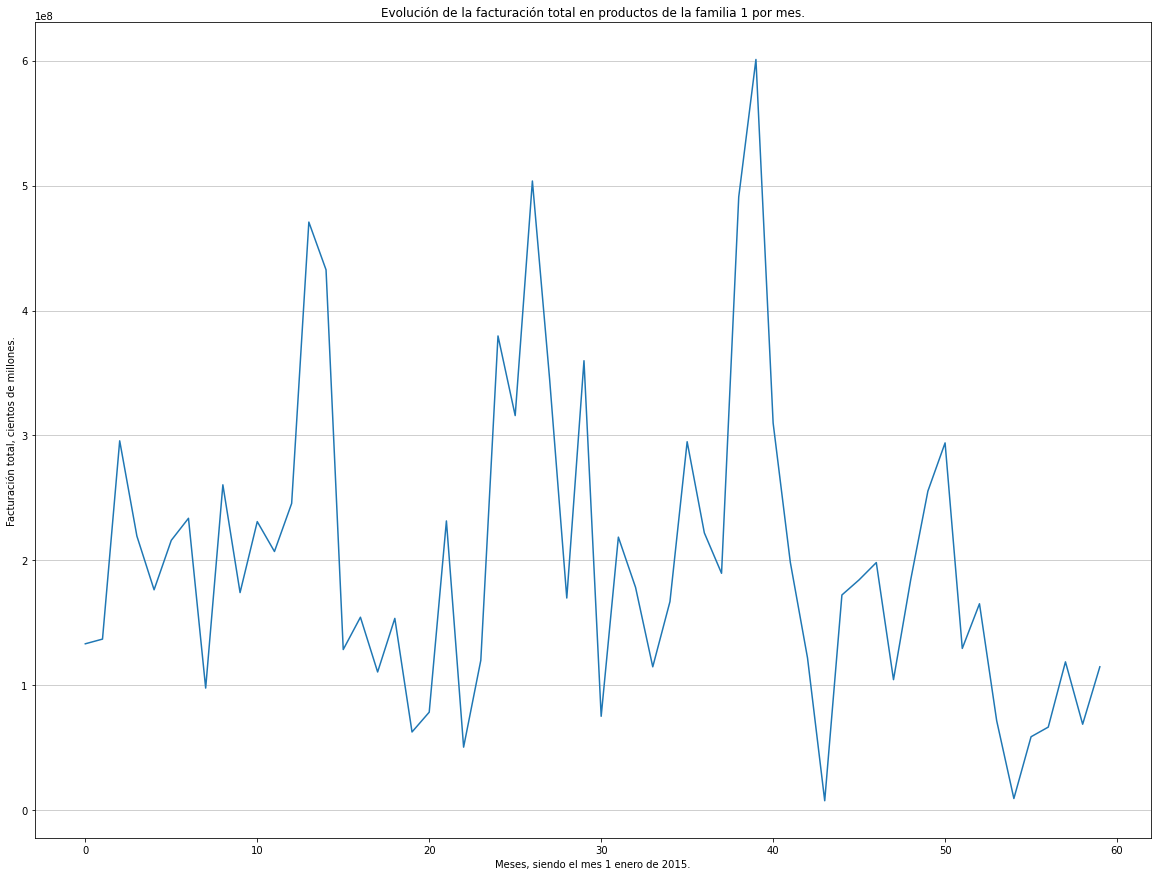

In [140]:
y = df_months_group1.total_sells
x = df_months_group1.months
ax = plt.figure().add_subplot(111)
ax.plot(y)
plt.title('Evolución de la facturación total en productos de la familia 1 por mes.')
plt.xlabel('Meses, siendo el mes 1 enero de 2015.')
plt.ylabel('Facturación total, cientos de millones.')

plt.grid(axis='y', alpha=0.75)

rcParams['figure.figsize'] = 20, 15

Observamos un gran componente cíclico en el volúmen de facturación. A la hora de realizar una regresión lineal vemos incluso que ese grado de explicatividad al mes del año (coeficiente de autodeterminación) es superior que en el caso que vimos de la facturación total:

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#transformación de las dimensiones necesaria
y = y.values.reshape(-1,1)
x = x.values.reshape(-1,1)

In [51]:
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.20330908378357238


La regresión inicial nos indica que hasta un 20% de nuestro volúmen de facturación en la familia de producto uno se debe al componente estacional. Estaríamos interesados en hayar relaciones que nos ayuden a modelar el 80% de esa causística que no es capaz de explicar el modelo.

## 2. Productos más relevantes.<a name="id2"></a>

Procede también preguntarse cuales son los productos con un porcentaje mayor en cuanto a facturación dentro de dicho grupo de productos 1. Se nos propone como umbral los productos que contengan hasta el 80% de la facturación. Haremos unas breves transformaciones adicionales sobre los datos debido al gran número de productos necesarios para llegar hasta dicho umbral: los 47 artículos más "importantes", acumulan aproximadamente el 80% de  la frequencia en la facturación:

In [80]:
df_tipodeproducto = pd.read_pickle("df_tipodeproducto.pkl")

In [81]:
#filtro de los 47 mas frecuentes:
df_tipodeproducto = df_tipodeproducto.sort_values('frequencia',ascending=False ).iloc[0:47,:]

In [85]:
df_tipodeproducto = pd.DataFrame({'producto':df_tipodeproducto.tipos_producto,'frequencia_absoluta':df_tipodeproducto.frequencia,'frequencia_relativa(%)':(((df_tipodeproducto.frequencia)/259256)*100)})

In [87]:
df_tipodeproducto

,producto,frequencia_absoluta,frequencia_relativa(%)
145,106594,68334,26.357731
135,105454,33860,13.060450
501,120440,13137,5.067192
8,23422,12343,4.760931
23,52211,6400,2.468602
51,84386,5287,2.039297
42,78893,5170,1.994168
46,81711,4944,1.906995
15,33673,4302,1.659364
236,111258,3569,1.376632


Podría ser de gran interés monitorizar y modelar la evolución de los 3 o 4 primeros productos más destacados.

## 3. Productos con problemas de calidad.<a name="id3"></a>

También, debido a que el objetivo central de nuestro proyecto es "aligerar" la carga de trabajo en cuanto a picos de producción se refiere, sería de interés hacer un análisis multivariable para identificar los productos con mayores problemas planteados en cuanto a calidad.

Para ello, visualicemos en una tabla dónde se concentra el 70% de las devoluciones por motivos de calidad.

In [128]:
df_quality_g1 = pd.read_pickle("df_quality_g1.pkl")
(unicos, cuenta) = np.unique(df_quality_g1.CodigoArticulo, return_counts=True)
df_refunds = pd.DataFrame({'producto':unicos,'frequencia_refund_calidad':cuenta})

In [123]:
print("Para los 5 ejercicios que analizamos encontramos un total de",df_refunds.frequencia_refund_calidad.sum(),"abonos en relación con la calidad del producto.")

Para los 5 ejercicios que analizamos encontramos un total de 8356 abonos en relación con la calidad del producto.


De esos más de 8000 refunds, vemos que la gran parte se concentran en unos pocos productos, concretamente en los 11 más devueltos. El producto 106594, recordemos que también es el que más frequencia de facturación tiene. Vemos problemas en cuanto a la calidad del producto 111258 que teniendo poco más del 1.3% de las facturaciones, acapara la segunda posición (19%) de los productos que nos dan más abonos.

In [129]:
df_refunds = df_refunds.sort_values('frequencia_refund_calidad',ascending=False ).iloc[0:10,:]
df_refunds = pd.DataFrame({'producto':df_refunds.producto,'frequencia_absoluta':df_refunds.frequencia_refund_calidad,'frequencia_relativa(%)':((df_refunds.frequencia_refund_calidad)/8356)*100})

In [130]:
df_refunds

,producto,frequencia_absoluta,frequencia_relativa(%)
26,106594,1749,20.931067
34,111601,1668,19.961704
9,52211,660,7.898516
59,123881,365,4.368119
24,105454,283,3.386788
2,23358,274,3.279081
4,23422,248,2.967927
60,123884,211,2.525132
0,5988,204,2.441360
50,120440,192,2.297750


Como comentábamos antes con el caso de los productos con más facturación, podría ser interesado modelar cuando se dan y qué condicienes los refunds de los productos que más problemas dan.

## 4. Evolución de la eficiencia en términos de calidad en dichos ejercicios.<a name="id4"></a>

Analizamos también de los excels disponibles el ratio facturación total vs refunds (asociados con defectos), para hacernos una idea de cómo evoluciona nuestra eficiencia en términos de calidad.

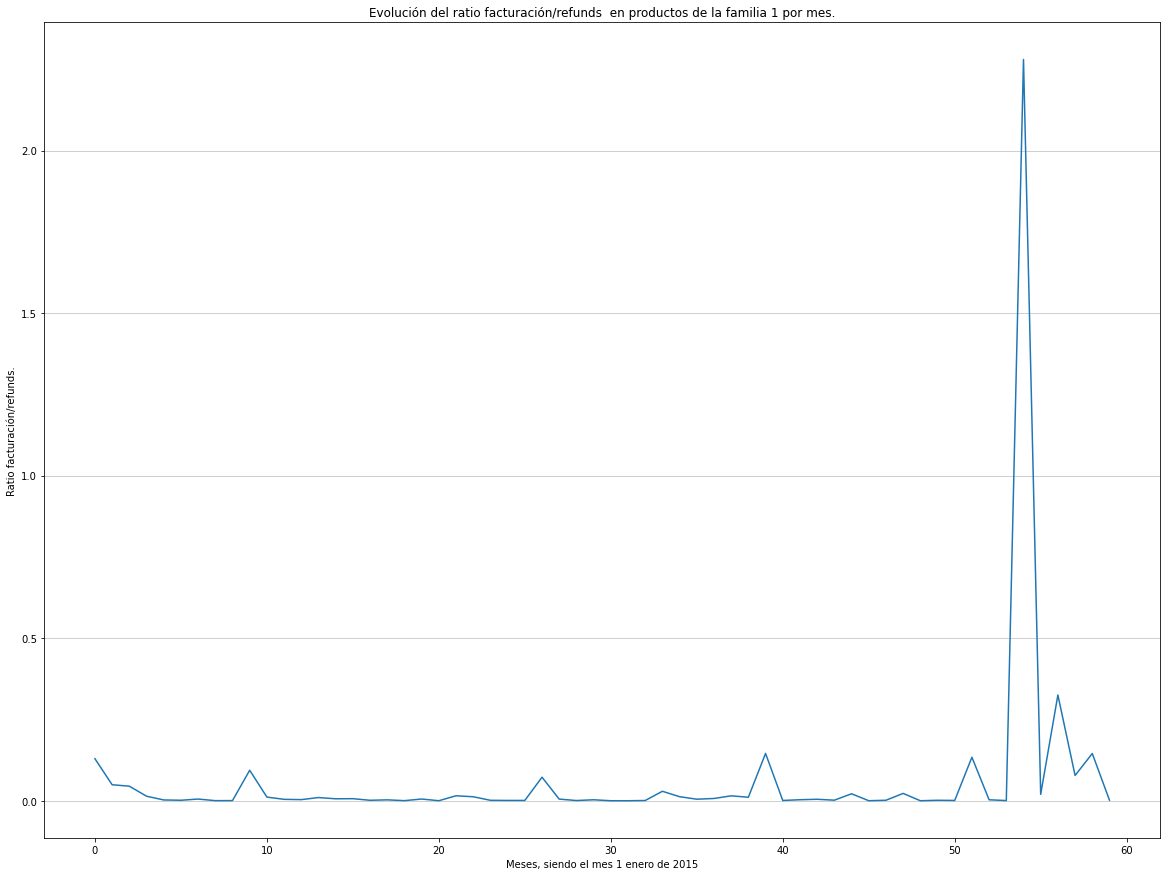

In [141]:
y = df_months_group1.refunds_vs_sells_ratio
x = df_months_group1.months
ax = plt.figure().add_subplot(111)
ax.plot(y)
plt.title('Evolución del ratio facturación/refunds  en productos de la familia 1 por mes.')
plt.xlabel('Meses, siendo el mes 1 enero de 2015')
plt.ylabel('Ratio facturación/refunds.')

plt.grid(axis='y', alpha=0.75)

rcParams['figure.figsize'] = 20, 15

## 5. Comentarios adicionales.<a name="id5"></a>

Vemos que es posible encontrar un componente cíclio en las variables, estudiadas. Sin embargo, debemos seguir visualizando y analizando relaciones entre otros componentes para poder realizar análisis verdaderamente útiles y que sean complementarios con modelos de redes neuronales o de métodos kernel para series temporales.